In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn
import scipy
import liibattery3d
from liibattery3d import correlationtest

## Load Dataframe

In [2]:
df = pd.read_csv('full_parameter_dataframe.csv')

In [3]:
df

,Unnamed: 0,Paper #,Set,Cathode \nThickness [µm],Anode \nThickness [µm],Cathode 3D \nCharateristic Length [µm],Anode 3D \nCharateristic\nLength [µm],n,tau,Q,SA/V [1/µm],SA gain,General Overall Architecture,General Cathode Architecture,General Anode Architecture,1C current Density [mA/cm^2],Cathode Material,Anode Material,charateristic_length
0,0,1,1,500,NaN,100.0,NaN,1.302510,0.485641,106.109051,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
1,1,1,1,500,NaN,100.0,NaN,1.171664,0.487356,105.112499,0.0296,14.80,2.5D,Solid Column,1D,1.78,LiFePO4,Lithium,100.0
2,11,17,1,220,NaN,2000.0,NaN,2.223919,0.947268,153.778365,0.0051,1.10,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,2000.0
3,12,17,2,220,NaN,180.0,NaN,2.244143,0.529848,151.124828,0.0102,2.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,180.0
4,13,17,3,220,NaN,17.0,NaN,1.884653,0.270364,152.606465,0.0694,15.30,2.5D,Electrolyte channel,1D,NaN,LiCoO2,Lithium,17.0
5,14,19,1,150,NaN,70.0,70.0,0.115141,0.000003,196.646059,0.0200,3.00,2.5D,1D,Electrolyte channel,N/R,Li4Ti5O12,Lithium,70.0
6,15,23,1,69,70.0,NaN,60.0,4.669976,0.092302,127.716693,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
7,16,23,2,69,70.0,NaN,60.0,4.526725,0.095259,127.906362,0.0267,1.90,2.5D,1D,Electrolyte channel,N/R,NMC (1/11),Graphite,60.0
8,17,27,1,15,15.0,15.0,15.0,2.421715,0.034467,135.232037,0.0222,11.42,Interdigitated,Int plate,Int plate,0.135,LiCoO2,Li4Ti5O12,15.0
9,18,31,1,6,NaN,0.5,NaN,2.363981,0.109881,306.757639,3.0100,18.10,2.5D,Coated Network,1D,N/R,V2O5,Lithium,0.5


## Pearson Correlation Testing

In [4]:
# Set variables
n = df['n'].values
tau = df['tau'].values
SA2V = df['SA/V [1/µm]'].values
SAgain = df['SA gain'].values
L = df['charateristic_length'].values

In [5]:
# Pearson correlation
correlationtest.correlation_hypothesis(n,SA2V,0.05)
correlationtest.correlation_hypothesis(tau,SA2V,0.05)
correlationtest.correlation_hypothesis(tau,SAgain,0.05)
correlationtest.correlation_hypothesis(tau,L,0.05)

pearson correlation betweeen the input variables is -0.12 with p value 0.72
Accept null hypothesis. The linear correlation  is statistically insignificant
pearson correlation betweeen the input variables is -0.31 with p value 0.35
Accept null hypothesis. The linear correlation  is statistically insignificant
pearson correlation betweeen the input variables is -0.24 with p value 0.47
Accept null hypothesis. The linear correlation  is statistically insignificant
pearson correlation betweeen the input variables is 0.79 with p value 0.00
Reject null hypothesis.The linear correlation is statistically significant


(0.7872393617066458, 0.00402814319435014)

## Spearman Correlation
Unlike Pearson correlation, Spearman correlation does not require the input sample to be normally distributed.

In [6]:
# Spearman correlation
correlationtest.correlation_hypothesis(n,SA2V,0.05,test='spearman')
correlationtest.correlation_hypothesis(tau,SA2V,0.05,test='spearman')
correlationtest.correlation_hypothesis(tau,SAgain,0.05,test='spearman')
correlationtest.correlation_hypothesis(tau,L,0.05,test='spearman')


spearman correlation betweeen the input variables is -0.14 with p value 0.69
Accept null hypothesis. The linear correlation  is statistically insignificant
spearman correlation betweeen the input variables is -0.14 with p value 0.68
Accept null hypothesis. The linear correlation  is statistically insignificant
spearman correlation betweeen the input variables is -0.12 with p value 0.72
Accept null hypothesis. The linear correlation  is statistically insignificant
spearman correlation betweeen the input variables is 0.64 with p value 0.04
Reject null hypothesis.The linear correlation is statistically significant


(0.6361705973295034, 0.03536007760356719)

## Calculate and plot linear regression line

(0.1280648986574654, -3.0801471615555633, 0.4800662203447117)

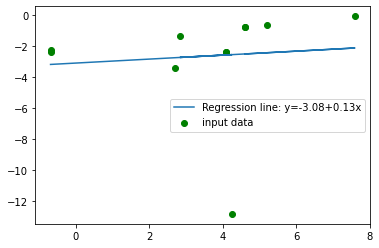

In [7]:
correlationtest.plot_linear_regression(np.log(L),np.log(tau))

## Detect and remove a specified number of outliers from linear fit

original std errer is 0.4800662203447117
Detect outlier at position x= -0.6931471805599453 y= -2.3589922103995073
new std error is 0.617399650676988


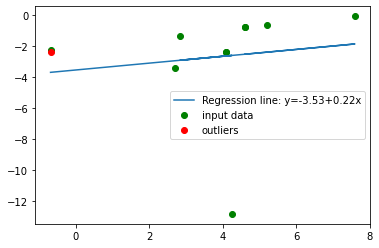

In [8]:
x, y = correlationtest.linear_outliers(np.log(L), np.log(tau), 1)